In [1]:
!pip install tensorflow

In [2]:
!pip install keras 

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,_),(X_test,_) = mnist.load_data()

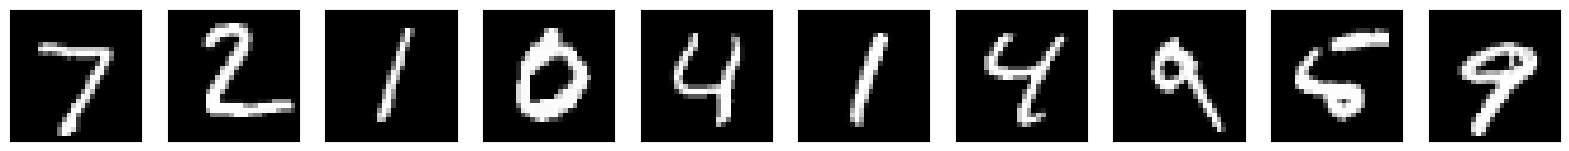

In [3]:
n=10

plt.figure(figsize=(20,4))

for i in range(n):
    
    ax=plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
plt.close()

In [4]:
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Reshape,UpSampling2D
from tensorflow.keras.models import Model

In [5]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_train = X_train.reshape(len(X_train),28*28*1)
X_test = X_test.reshape(len(X_test),28*28*1)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [6]:
Autoencoder_input = Input(shape=(28,28,1))

conv_en = Conv2D(32, (3,3), activation="relu", padding="same", kernel_initializer="he_normal")(Autoencoder_input)
conv_en = MaxPooling2D((2,2), padding="same")(conv_en)

conv_en = Conv2D(32,(3,3),activation="relu",padding="same")(conv_en)
conv_en = MaxPooling2D((2,2),padding="same")(conv_en)

conv_en = Conv2D(4,(3,3),activation="relu",padding="same")(conv_en)
conv_en = MaxPooling2D((2,2),padding="same")(conv_en)

conv_en = Flatten(name="bot")(conv_en)
conv_de = Reshape((4,4,4),input_shape=(64,),name="bot0")(conv_en)

conv_de = Conv2D(4,(3,3),activation="relu",padding="same",name="bot1")(conv_de)
conv_de = UpSampling2D((2,2),name="bot2")(conv_de)

conv_de = Conv2D(32,(3,3),activation="relu",padding="same",name="bot3")(conv_de)
conv_de = UpSampling2D((2,2),name="bot4")(conv_de)

conv_de = Conv2D(32,(3,3),activation="relu",padding="valid",name="bot5")(conv_de)
conv_de = UpSampling2D((2,2),name="bot6")(conv_de)

conv_de = Conv2D(1,(3,3),activation="sigmoid",padding="same",name="bot7")(conv_de)

AE_Conv = Model(inputs=Autoencoder_input , outputs=conv_de)

AE_Conv.compile(optimizer=tf.keras.optimizers.SGD(0.09,clipvalue=2.5),loss="binary_crossentropy",metrics=["accuracy"])
AE_Conv.summary()

C:\Users\Laptop\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 4)             │           1,156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot (Flatten)                        │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot0 (Reshape)                       │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot1 (Conv2D)                        │ (None, 4, 4, 4)             │             148 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot2 (UpSampling2D)                  │ (None, 8, 8, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot3 (Conv2D)                        │ (None, 8, 8, 32)            │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot4 (UpSampling2D)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot5 (Conv2D)                        │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot6 (UpSampling2D)                  │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot7 (Conv2D)                        │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,593 (84.35 KB)

 Trainable params: 21,593 (84.35 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
au_encoder = Model(inputs=Autoencoder_input , outputs=AE_Conv.get_layer("bot").output,name="Encoder")
au_encoder.summary()

Model: "Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 4)             │           1,156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot (Flatten)                        │ (None, 64)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,724 (41.89 KB)

 Trainable params: 10,724 (41.89 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
de_input = Input(shape=(64,))
de_out = AE_Conv.get_layer("bot0")(de_input)
for i in range(1,8):
    st = f"bot{i}"
    de_out = AE_Conv.get_layer(st)(de_out)

au_decoder = Model(inputs=de_input , outputs=de_out , name="Decoder")
au_decoder.summary()

Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot0 (Reshape)                       │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot1 (Conv2D)                        │ (None, 4, 4, 4)             │             148 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot2 (UpSampling2D)                  │ (None, 8, 8, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot3 (Conv2D)                        │ (None, 8, 8, 32)            │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot4 (UpSampling2D)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot5 (Conv2D)                        │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot6 (UpSampling2D)                  │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot7 (Conv2D)                        │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,869 (42.46 KB)

 Trainable params: 10,869 (42.46 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28 , 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(f"New Shape of X_train: {X_train.shape}")
print(f"New Shape of X_test: {X_test.shape}")

New Shape of X_train: (60000, 28, 28, 1)
New Shape of X_test: (10000, 28, 28, 1)


In [10]:
from time import time

tic = time()

AE_Conv.fit(X_train,X_train,
            epochs=100,
            batch_size=1024,
            verbose=2,
            shuffle=False,validation_split=0.1)
toc = time()
t = toc-tic
print(f"Time taken by model to train is {t/60:.2f} mins")

Epoch 1/100
53/53 - 41s - 782ms/step - accuracy: 0.8065 - loss: 0.3607 - val_accuracy: 0.7946 - val_loss: 0.2560
Epoch 2/100
53/53 - 42s - 801ms/step - accuracy: 0.7880 - loss: 0.2357 - val_accuracy: 0.8042 - val_loss: 0.2300
Epoch 3/100
53/53 - 37s - 691ms/step - accuracy: 0.7894 - loss: 0.2167 - val_accuracy: 0.7910 - val_loss: 0.2060
Epoch 4/100
53/53 - 35s - 660ms/step - accuracy: 0.7903 - loss: 0.2075 - val_accuracy: 0.7916 - val_loss: 0.1992
Epoch 5/100
53/53 - 39s - 731ms/step - accuracy: 0.7910 - loss: 0.2014 - val_accuracy: 0.8029 - val_loss: 0.2004
Epoch 6/100
53/53 - 37s - 701ms/step - accuracy: 0.7926 - loss: 0.1939 - val_accuracy: 0.7920 - val_loss: 0.1893
Epoch 7/100
53/53 - 34s - 646ms/step - accuracy: 0.7929 - loss: 0.1897 - val_accuracy: 0.8034 - val_loss: 0.1911
Epoch 8/100
53/53 - 34s - 644ms/step - accuracy: 0.7941 - loss: 0.1839 - val_accuracy: 0.8011 - val_loss: 0.1872
Epoch 9/100
53/53 - 34s - 646ms/step - accuracy: 0.7940 - loss: 0.1819 - val_accuracy: 0.8040 - 

In [11]:
img_compressed = au_encoder.predict(X_test)
dec_img = au_decoder.predict(img_compressed)
print(f"The shape of images when are first passed through encoder and then decoder is: {dec_img.shape}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
The shape of images when are first passed through encoder and then decoder is: (10000, 28, 28, 1)


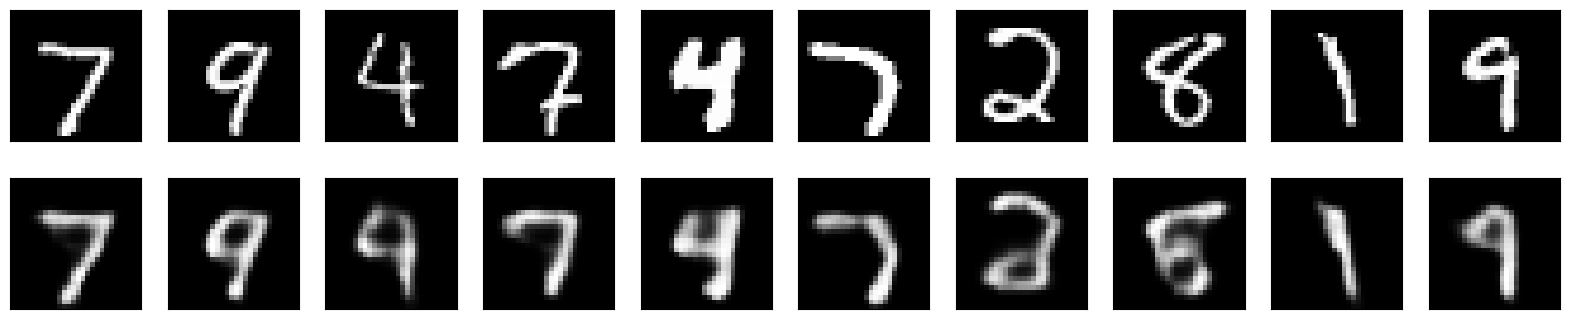

In [12]:
n=10
k=12
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i*k].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(dec_img[i*k].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [13]:
au_img = AE_Conv.predict(X_test)
print(f"The shape of generated images from AutoEncoders is: {au_img.shape}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
The shape of generated images from AutoEncoders is: (10000, 28, 28, 1)


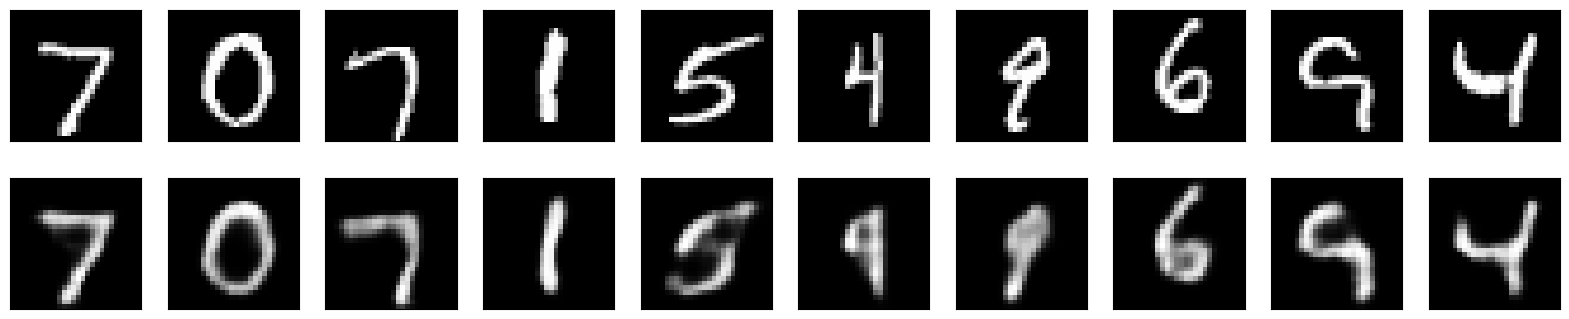

In [14]:
n=10
k=13
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i*k].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(au_img[i*k].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [15]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [18]:
noise = 0.5
X_train_noisy = X_train + noise * np.random.normal(loc=0.0 , scale=1.0 , size=X_train.shape)
X_test_noisy = X_test + noise * np.random.normal(loc=0.0 , scale=1.0 , size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
Y_test_noisy = np.clip(X_test_noisy, 0., 1.)

print(f"Shape of X_train_noisy: {X_train_noisy.shape}")
print(f"Shape of X_test_noisy: {X_test_noisy.shape}")

Shape of X_train_noisy: (60000, 28, 28, 1)
Shape of X_test_noisy: (10000, 28, 28, 1)


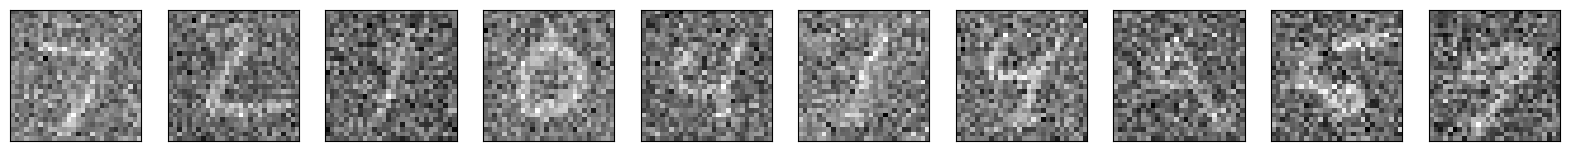

In [19]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
plt.close()

In [20]:
Autoencoder_input = Input(shape=(28,28,1))

conv_en = Conv2D(32, (3,3), activation="relu", padding="same", kernel_initializer="he_normal")(Autoencoder_input)
conv_en = MaxPooling2D((2,2), padding="same")(conv_en)

conv_en = Conv2D(32, (3,3), activation="relu", padding="same")(conv_en)
conv_en = MaxPooling2D((2,2), padding="same")(conv_en)

conv_en = Conv2D(4, (3,3), activation="relu", padding="same")(conv_en)
conv_en = MaxPooling2D((2,2), padding="same")(conv_en)

conv_en = Flatten(name="bot")(conv_en)

conv_de = Reshape((4,4,4),input_shape=(64,),name="bot0")(conv_en)

conv_de = Conv2D(4, (3,3), activation="relu", padding="same",name="bot1")(conv_de)
conv_de = UpSampling2D((2,2), name="bot2")(conv_de)

conv_de = Conv2D(32, (3,3), activation="relu", padding="same",name="bot3")(conv_de)
conv_de = UpSampling2D((2,2), name="bot4")(conv_de)

conv_de = Conv2D(32, (3,3), activation="relu", padding="valid",name="bot5")(conv_de)
conv_de = UpSampling2D((2,2), name="bot6")(conv_de)

conv_de = Conv2D(1, (3,3), activation="sigmoid", padding="same",name="bot7")(conv_de)

Noisy_AE = Model(inputs=Autoencoder_input , outputs=conv_de)

Noisy_AE.compile(optimizer=tf.keras.optimizers.SGD(0.09,clipvalue=2),loss="binary_crossentropy",metrics=["accuracy"])
Noisy_AE.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 4)             │           1,156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot (Flatten)                        │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot0 (Reshape)                       │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot1 (Conv2D)                        │ (None, 4, 4, 4)             │             148 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot2 (UpSampling2D)                  │ (None, 8, 8, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot3 (Conv2D)                        │ (None, 8, 8, 32)            │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot4 (UpSampling2D)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot5 (Conv2D)                        │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot6 (UpSampling2D)                  │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot7 (Conv2D)                        │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,593 (84.35 KB)

 Trainable params: 21,593 (84.35 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
an_encoder = Model(inputs=Autoencoder_input , outputs=Noisy_AE.get_layer("bot").output)
an_encoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 4)             │           1,156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot (Flatten)                        │ (None, 64)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,724 (41.89 KB)

 Trainable params: 10,724 (41.89 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
de_input = Input(shape=(64,))
de_output = Noisy_AE.get_layer("bot0")(de_input)
for i in range(1,8):
    st = f"bot{i}"
    de_output = Noisy_AE.get_layer(st)(de_output)

an_decoder = Model(inputs=de_input , outputs=de_output , name="Decoder")
an_decoder.summary()

Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot0 (Reshape)                       │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot1 (Conv2D)                        │ (None, 4, 4, 4)             │             148 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot2 (UpSampling2D)                  │ (None, 8, 8, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot3 (Conv2D)                        │ (None, 8, 8, 32)            │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot4 (UpSampling2D)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot5 (Conv2D)                        │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot6 (UpSampling2D)                  │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot7 (Conv2D)                        │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,869 (42.46 KB)

 Trainable params: 10,869 (42.46 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from time import time

tic = time()

Noisy_AE.fit(X_train_noisy,X_train,
            epochs=100,
            batch_size=256,
            verbose=2,
            shuffle=False,validation_split=0.1)
toc = time()
t = toc-tic
print(f"Time taken by model to train is {t/60:.2f} mins")

Epoch 1/100
211/211 - 31s - 149ms/step - accuracy: 0.8031 - loss: 0.3041 - val_accuracy: 0.8068 - val_loss: 0.2489
Epoch 2/100
211/211 - 37s - 176ms/step - accuracy: 0.7948 - loss: 0.2366 - val_accuracy: 0.7953 - val_loss: 0.2212
Epoch 3/100
211/211 - 35s - 167ms/step - accuracy: 0.7928 - loss: 0.2164 - val_accuracy: 0.7975 - val_loss: 0.2079
Epoch 4/100
211/211 - 30s - 143ms/step - accuracy: 0.7938 - loss: 0.2053 - val_accuracy: 0.7979 - val_loss: 0.2000
Epoch 5/100
211/211 - 34s - 160ms/step - accuracy: 0.7950 - loss: 0.1984 - val_accuracy: 0.7987 - val_loss: 0.1920
Epoch 6/100
211/211 - 38s - 181ms/step - accuracy: 0.7963 - loss: 0.1923 - val_accuracy: 0.7992 - val_loss: 0.1870
Epoch 7/100
211/211 - 45s - 216ms/step - accuracy: 0.7973 - loss: 0.1874 - val_accuracy: 0.7994 - val_loss: 0.1826
Epoch 8/100
211/211 - 29s - 136ms/step - accuracy: 0.7981 - loss: 0.1836 - val_accuracy: 0.7994 - val_loss: 0.1791
Epoch 9/100
211/211 - 29s - 136ms/step - accuracy: 0.7987 - loss: 0.1805 - val_a

In [24]:
img_compressed = an_encoder.predict(X_test_noisy)
de_img = au_decoder.predict(img_compressed)
print(f"The shape of images when are first passed through encoder and then decoder is: {de_img.shape}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
The shape of images when are first passed through encoder and then decoder is: (10000, 28, 28, 1)


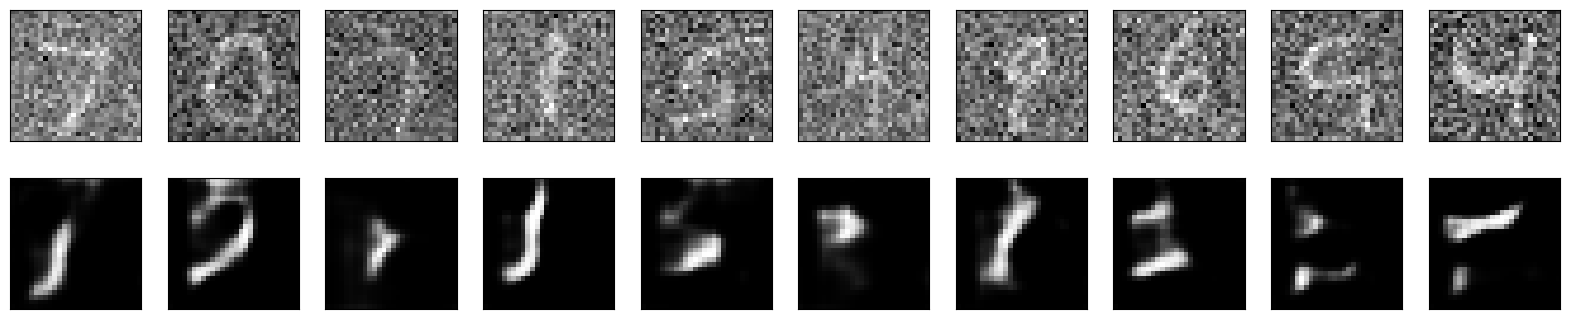

In [25]:
n=10
k=13
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test_noisy[i*k].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(de_img[i*k].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [26]:
au_img = Noisy_AE.predict(X_test_noisy)
print(f"The shape of generated images from Noisy AutoEncoders is: {au_img.shape}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
The shape of generated images from Noisy AutoEncoders is: (10000, 28, 28, 1)


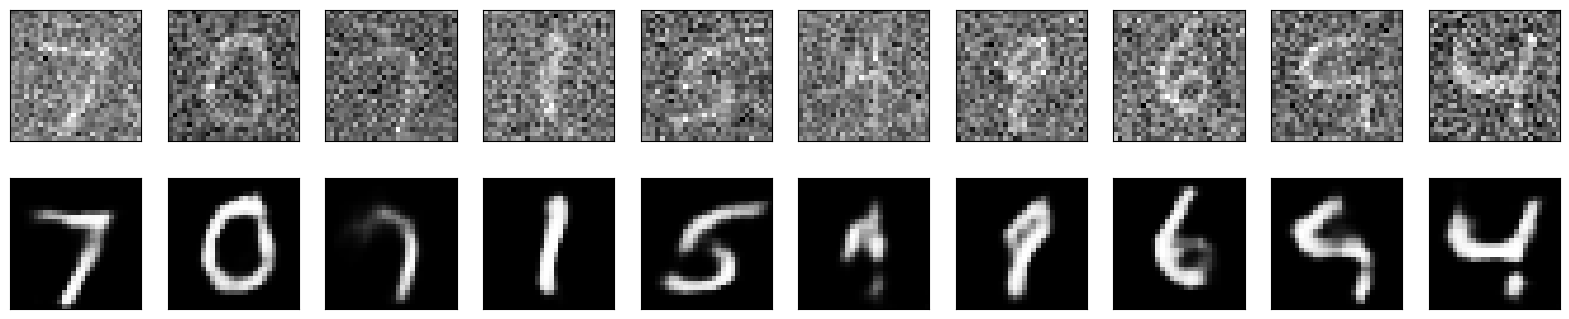

In [27]:
n=10
k=13
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test_noisy[i*k].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(au_img[i*k].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()